In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Set parameters.
g = 9.81               # gravitational acceleration (m.s^{-2})
vt = 4.9               # trim velocity (m/s)
CD = 1.0 / 5.0         # drag coefficient
CL = 1.0               # lift coefficient

# Set initial conditions.
v0 = 6.5            # start at the trim velocity (m/s)
theta0 = -0.1       # trajectory angle
x0 = 0.0            # initial horizontal position
y0 = 2.0            # initial vertical position (altitude)

In [3]:
def rhs(u,CL,CD,g,vt):
    v,theta,x,y = u
    rhs = np.array([-g * math.sin(theta) - CD / CL * g / vt**2 * v**2,
                    -g * math.cos(theta) / v + g / vt**2 * v,
                    v * math.cos(theta),
                    v * math.sin(theta)])
    return rhs

In [4]:
def euler_step(u,f,dt,*args):
    u_new = u + dt*f(u,*args)
    return u_new

def rk2_step(u,f,dt,*args):
    u_star = u + 0.5 * dt * f(u, *args)
    u_new = u + dt * f(u_star, *args)
    return u_new

T   = 15.0
dt  = 0.01
N   = int(T/dt)+1

u_euler = np.empty((N,4))
u_rk2   = np.empty((N,4))

u_euler[0] = np.array([v0,theta0,x0,y0])
u_rk2[0]   = np.array([v0,theta0,x0,y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n],rhs,dt,CL,CD,g,vt)
    u_rk2[n+1]   = rk2_step(u_rk2[n],rhs,dt,CL,CD,g,vt)

In [5]:
x_euler = u_euler[:, 2]
y_euler = u_euler[:, 3]
x_rk2 = u_rk2[:, 2]
y_rk2 = u_rk2[:, 3]

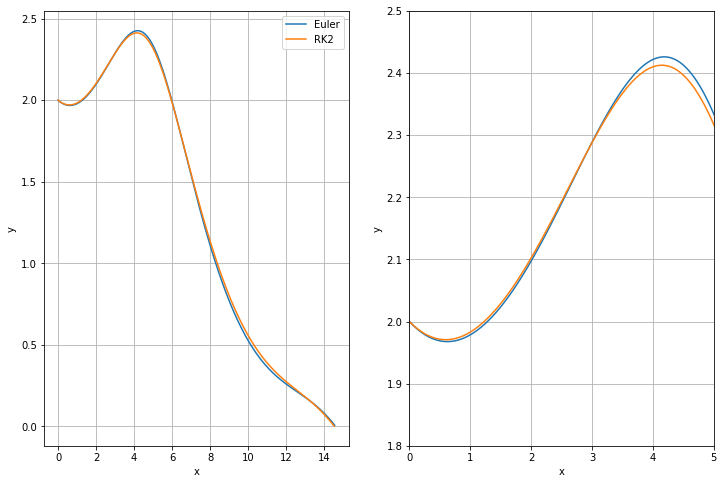

In [6]:
idx_negative_euler = np.where(y_euler < 0.0)[0]
if len(idx_negative_euler) == 0:
    idx_ground_euler = N - 1
    print('[Euler] Glider has not touched ground yet!')
else:
    idx_ground_euler = idx_negative_euler[0]
# Get the index of the first negative element of y_rk2.
idx_negative_rk2 = np.where(y_rk2 < 0.0)[0]
if len(idx_negative_rk2) == 0:
    idx_ground_rk2 = N - 1
    print('[RK2] Glider has not touched ground yet!')
else:
    idx_ground_rk2 = idx_negative_rk2[0]
    
# Plot the glider's path for both schemes.
plt.figure(figsize=(12.0, 8.0))
plt.subplot(121)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_euler[:idx_ground_euler], y_euler[:idx_ground_euler],
            label='Euler')
plt.plot(x_rk2[:idx_ground_rk2], y_rk2[:idx_ground_rk2],
            label='RK2')
plt.legend();
# Let's take a closer look!
plt.subplot(122)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_euler, y_euler, label='Euler')
plt.plot(x_rk2, y_rk2, label='RK2')
plt.xlim(0.0, 5.0)
plt.ylim(1.8, 2.5);